In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 21 12:36:38 2024

@author: au622616
"""

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from file_management_lib import get_paths

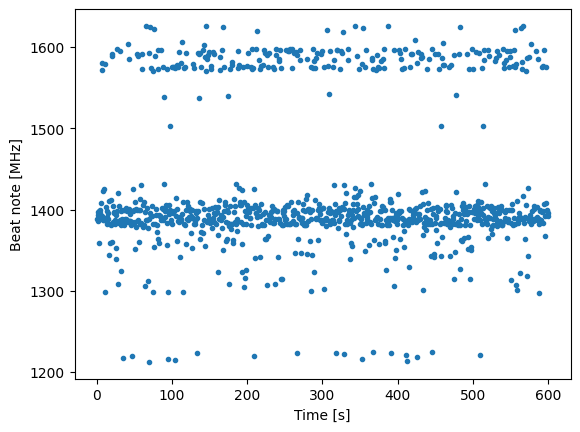

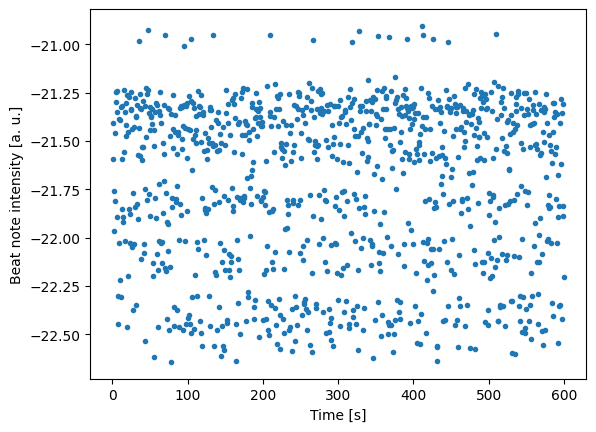

In [6]:


directory = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\22-11\beat_note"
sample_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\21-11\sample2"
path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\21-11\beat_note\2024-11-21_11-33-06-690521esa.txt"


def plot_drift(directory,xaxis,delta_time,plot=False):
    plt.figure()
    centers = []
    intensities = []
    times = []
    time = 0
    for path in get_paths(directory)[0:1000]:
        time = time + delta_time
        df = np.loadtxt(path,skiprows=1)
        skip = 100
        freqs = df[0,skip:]/1e6
        ps = df[1,skip:]
        p_max = np.max(ps)
        if p_max > -65:
            if plot:
                plt.figure()
                plt.plot(freqs,ps)
            res = freqs[np.argmax(ps)]
            centers.append(res)
            times.append(time)
            intensities.append(p_max)
            
        
    centers = np.array(centers)
    time = np.array(time)
    #centers = centers - np.mean(centers)
    std = np.std(centers)
    
    plt.plot(times, centers,'.')
    
    plt.xlabel(xaxis)
    plt.ylabel('Beat note [MHz]')
    fname = "beat_note_sil.txt"
    #np.savetxt(fname, np.transpose([time,centers]))
    plt.figure()
    plt.plot(times,intensities,'.')
    plt.xlabel(xaxis)
    plt.ylabel('Beat note intensity [a. u.]')
    return centers

paths = get_paths(directory)

def plot_beat_note(path):
    df = np.loadtxt(path,skiprows=1)
    skip = 1
    freqs = df[0,skip:]/1e6
    ps = df[1,skip:]
    plt.plot(freqs,ps)

# for sample in get_paths(sample_dir):
#     plt.figure()
#     plot_beat_note(sample)

centers = plot_drift(directory,'Time [s]',.6,plot=False)

# plot_beat_note(paths[80])
# plt.xlim([1100,1700])
# plt.xlabel('Beat note [MHz]')
# plt.ylabel('ESA power [dBm]')
#plt.plot(centers)





(100.0, 120.0)

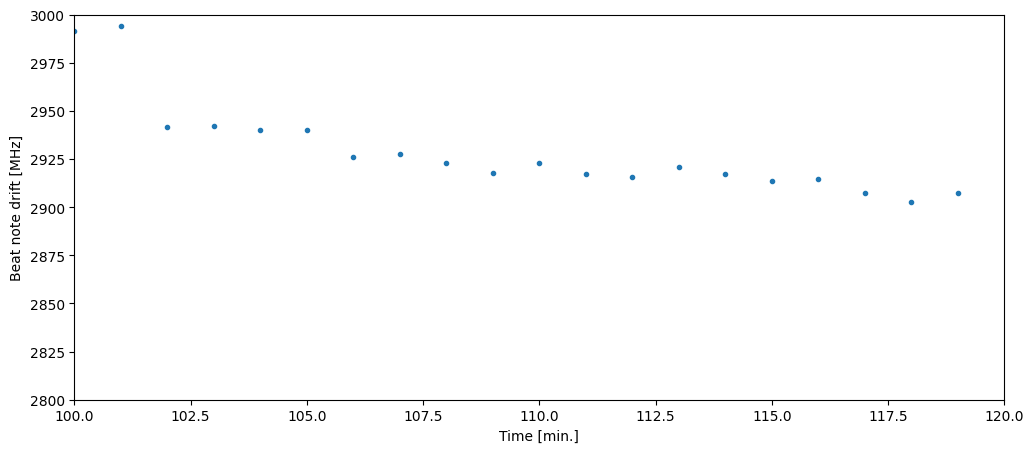

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 16 08:40:00 2024

@author: au622616
"""

import matplotlib.pyplot as plt
import numpy as np
from file_management_lib import get_paths
import lwa_lib as lwa
from scipy.optimize import curve_fit

directory = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\15-10\pp_nkt_beat_note"
directory2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-10\ushaped_nkt_beat_note"
directory3 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-10\ushaped_nkt_beat_note_long"
directory4 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\18-10\beat_note"
directory_sil = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\6-11\beat_note_sil"
directory_passive = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\7-11\beat_note"
directory_free_running = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\8-11\beat_note_free_running"
directory_sil2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\8-11\beat_note_sil_2"
directory_styro = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-11\beat_note_free_running"
directory_styro2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\12-11\beat_note"

path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-10\ushaped_nkt_beat_note_long\2024-10-16_10-20-41esa.txt"
path_beat_note = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-10\ushaped_nkt_beat_note\2024-10-16_10-08-22esa.txt"
psd_path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-10\PSD_injection_locked.txt"
psd2_path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\20-6-ushaped\FN_460uW_400uW_FB.txt"

path_linewidth = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\6-11\beat_note\2024-11-06_14-07-19-207423esa.txt"


path_styro = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-11\beat_note\2024-11-08_21-11-50-414172esa.txt"
path_styro2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-11\beat_note\2024-11-08_21-30-11-484428esa.txt"
path_styro3 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-11\beat_note\2024-11-09_00-57-37-808868esa.txt"
path_styro4 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-11\beat_note\2024-11-09_02-17-00-645936esa.txt"

def plot_drift(directory,xaxis):
    plt.figure()
    centers = []
    for path in get_paths(directory):
        df = np.loadtxt(path,skiprows=1)
        skip = 100
        freqs = df[0,skip:]/1e6
        ps = df[1,skip:]
        res = freqs[np.argmax(ps)]
        centers.append(res)
        
        
    centers = np.array(centers)
    #centers = centers - np.mean(centers)
    std = np.std(centers)
    
    plt.plot(centers,'.')
    
    plt.xlabel(xaxis)
    plt.ylabel('Beat note drift [MHz]')
    return centers

def plot_drift2(directory,xaxis):
    plt.figure(figsize=[12,5])
    centers = []
    for path in get_paths(directory):
        df = np.loadtxt(path,skiprows=1)
        skip = 100
        freqs = df[0,skip:]/1e6
        ps = df[1,skip:]
        res = freqs[np.argmax(ps)]
        if res < 35000:
            centers.append(res)
    
        
    centers = np.array(centers)
    #centers = centers - np.mean(centers)
    std = np.std(centers)
    
    plt.plot(centers,'.')
    
    plt.xlabel(xaxis)
    plt.ylabel('Beat note drift [MHz]')
    return centers

#plot_drift(directory4,'Time [~s]')
#centers = plot_drift(directory_passive,'Time [min.]')

def plot_beat_note(path):
    df = np.loadtxt(path,skiprows=1)
    skip = 1
    freqs = df[0,skip:]/1e6
    ps = df[1,skip:]
    plt.plot(freqs,ps)

#plot_beat_note(path_styro4)
# plt.xlim([4694.7,4694.85])
# plt.ylim([-60,-35])

plot_drift2(directory_styro2,'Time [min.]')
plt.ylim([2800,3000])
plt.xlim([100,120])
#plt.ylim([1000,1550])
#np.savetxt('fname', X)

#df = np.loadtxt(path,skiprows=1)

# skip = 10
# freqs = df[0,skip:]/1e6
# ps = df[1,skip:]
# res = freqs[np.argmax(ps)]
# print(res)
# plt.plot(freqs,ps)

# psd = lwa.LWA(psd_path)
# psd2 = lwa.LWA(psd2_path)

# psd.plot()
# psd2.plot()

# def gauss(x,a,b,c):
#     return a - b*(x-c)**2

# df = np.loadtxt(path_beat_note,skiprows=1)
# skip = 100
# freqs = df[0,skip:]/1e6
# ps = df[1,skip:]
# res = freqs[np.argmax(ps)]
# freqs = freqs - res + 8

# height = -52
# p_guess = [height,.02,0]
# popt,_ = curve_fit(gauss,freqs,ps,p0=p_guess)

# x_range = 50
# plt.xlim(-x_range,x_range)
# plt.ylim(-100,-40)
# plt.xlabel('Beat note detuning [MHz]')
# plt.ylabel('ESA power [dBm]')

# plt.plot(freqs,ps)
# plt.plot(freqs,gauss(freqs,*popt))
# plt.plot(freqs,gauss(freqs,*p_guess))
# plt.axhline(height - 3,color='red')'

